In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, 
RandomForestClassifier, StackingClassifier, VotingClassifier, StackingClassifier)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, RUSBoostClassifier, BalancedRandomForestClassifier

In [3]:
df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [6]:
df.drop(columns = ["DoctorInCharge", "PatientID"], inplace = True)

In [7]:
df["Age"].min()

20

In [8]:
bins = [0, 30, 60, 100]
labels = ["Youth", "Middle-Aged", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)
age_diagnosis = df.groupby("AgeGroup")["Diagnosis"].value_counts()
age_diagnosis

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_10904\571542405.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diagnosis = df.groupby("AgeGroup")["Diagnosis"].value_counts()


AgeGroup     Diagnosis
Youth        1            246
             0             19
Middle-Aged  1            651
             0             62
Senior       1            627
             0             54
Name: count, dtype: int64

In [9]:
print(age_diagnosis.unstack())
age_diagnosis = age_diagnosis.unstack()

Diagnosis     0    1
AgeGroup            
Youth        19  246
Middle-Aged  62  651
Senior       54  627


<Figure size 2000x2000 with 0 Axes>

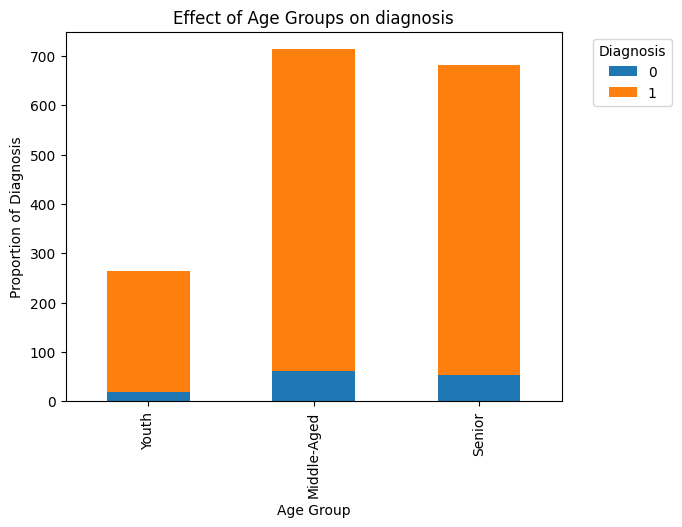

In [11]:
plt.figure(figsize = (20, 20))
age_diagnosis.plot(kind = "bar", stacked = True)
plt.title("Effect of Age Groups on diagnosis")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Diagnosis")
plt.legend(title = 'Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
df["Gender"].value_counts()

Gender
1    855
0    804
Name: count, dtype: int64

In [13]:
gender_diagnosis = df.groupby("Gender")['Diagnosis'].value_counts()
gender_diagnosis

Gender  Diagnosis
0       1            729
        0             75
1       1            795
        0             60
Name: count, dtype: int64

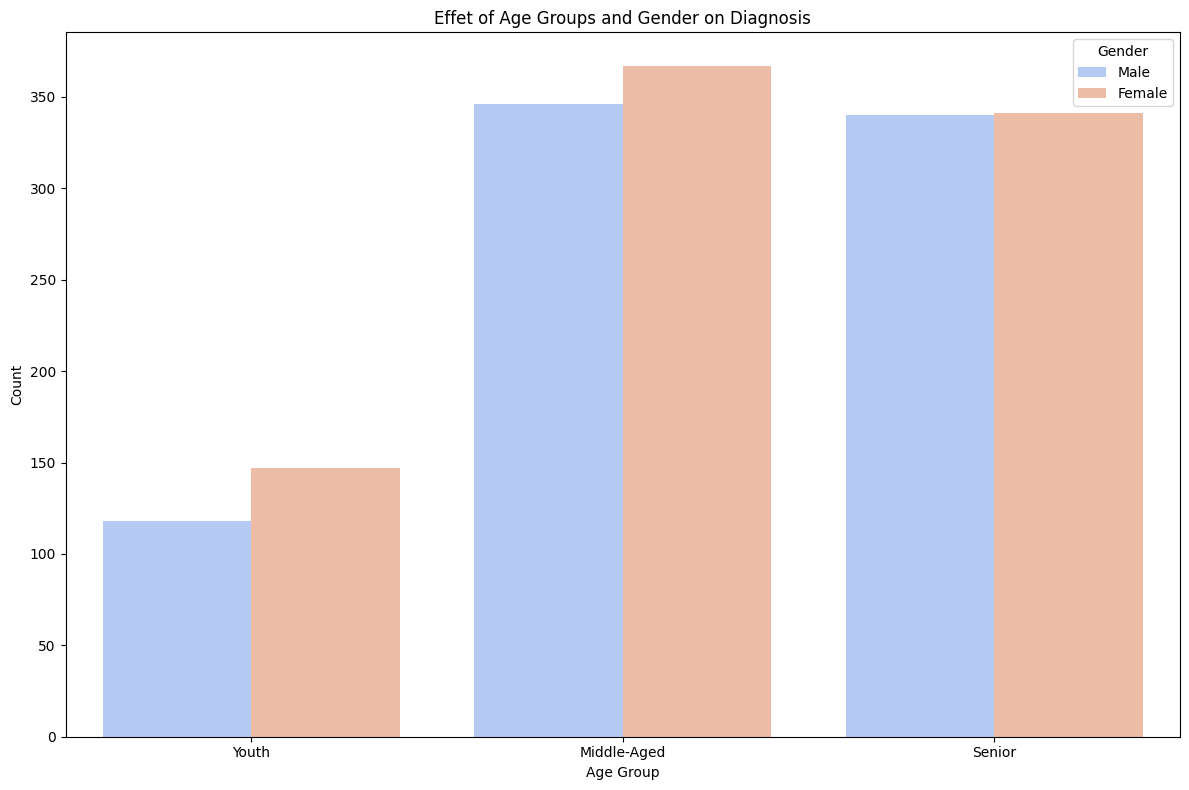

In [14]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = "AgeGroup", hue = 'Gender', palette = 'coolwarm', dodge = True)
plt.title("Effet of Age Groups and Gender on Diagnosis")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

In [15]:
smoking_diagnosis = df.groupby("Smoking")["Diagnosis"].value_counts()
smoking_diagnosis

Smoking  Diagnosis
0        1            1072
         0             101
1        1             452
         0              34
Name: count, dtype: int64

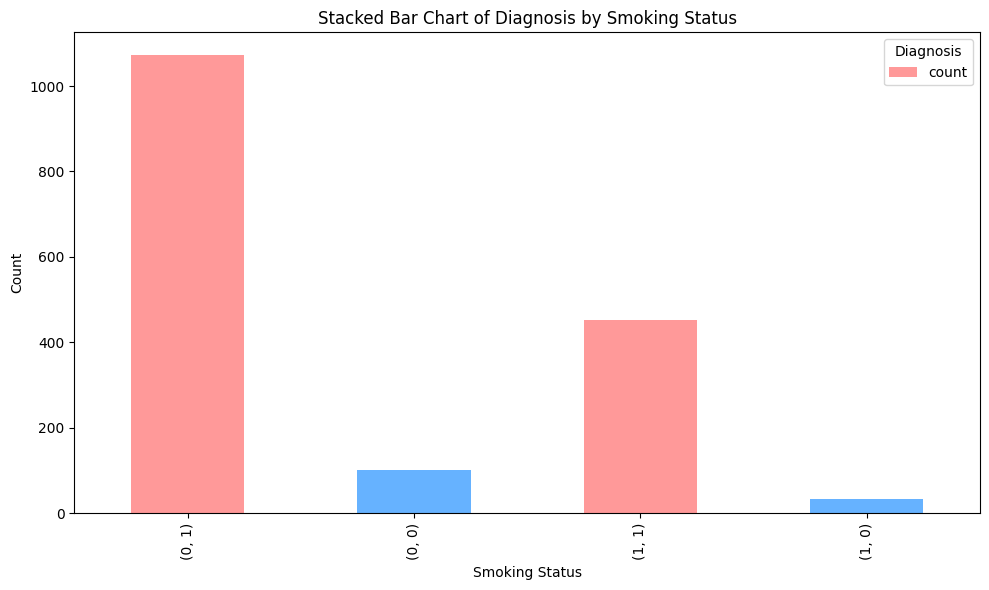

In [16]:
ax = smoking_diagnosis.plot(kind = 'bar', stacked = True, figsize = (10, 6), color = ['#FF9999','#66B2FF'])
plt.title('Stacked Bar Chart of Diagnosis by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title = "Diagnosis")
plt.tight_layout()
plt.show()

In [17]:
ethnicity_diagnosis = df.groupby("Ethnicity")["Diagnosis"].value_counts()
ethnicity_diagnosis

Ethnicity  Diagnosis
0          1            895
           0             79
1          1            319
           0             30
2          1            159
           0             15
3          1            151
           0             11
Name: count, dtype: int64

<Figure size 1200x700 with 0 Axes>

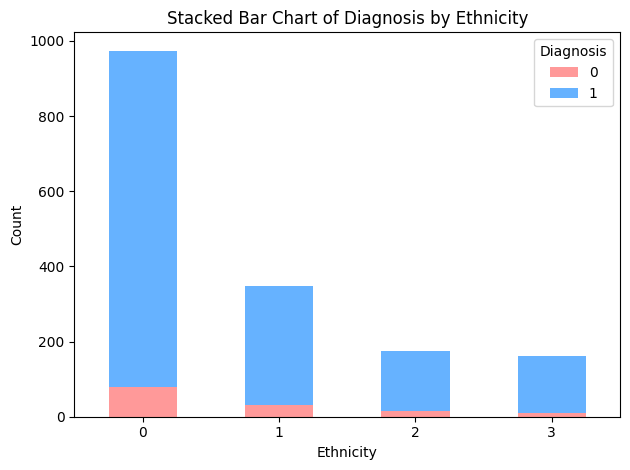

In [18]:
ethnicity_diagnosis = df.groupby(["Ethnicity"])['Diagnosis'].value_counts().unstack()
plt.figure(figsize = (12, 7))
ethnicity_diagnosis.plot(kind = 'bar', stacked = True, color = ['#FF9999', '#66B2FF'])
plt.title('Stacked Bar Chart of Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


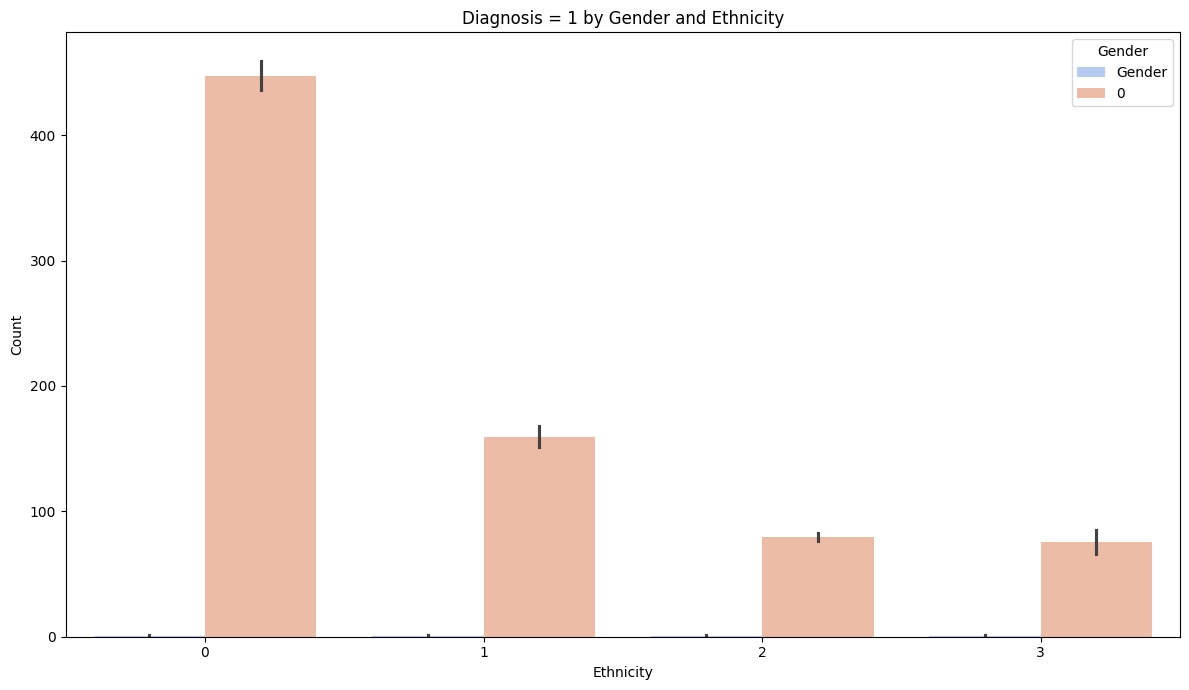

In [19]:
diagnosis1_df = df[df["Diagnosis"] == 1]
gender_ethnicity_diagnosis = diagnosis1_df.groupby(['Ethnicity', 'Gender']).size()
gender_ethnicity_diagnosis = gender_ethnicity_diagnosis.reset_index()
gender_ethnicity_diagnosis = gender_ethnicity_diagnosis.melt(id_vars='Ethnicity', value_name='Count', var_name='Gender')
plt.figure(figsize=(12, 7))
sns.barplot(data=gender_ethnicity_diagnosis, x='Ethnicity', y='Count', hue='Gender', palette='coolwarm')
plt.title('Diagnosis = 1 by Gender and Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

   SocioeconomicStatus  count
0                    1    610
1                    0    480
2                    2    434

   SocioeconomicStatus  Count
0                    1    610
1                    0    480
2                    2    434


C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_10904\338125860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = socioeconomic_diagnosis_df, x = 'SocioeconomicStatus', y = 'Count', palette = 'viridis')


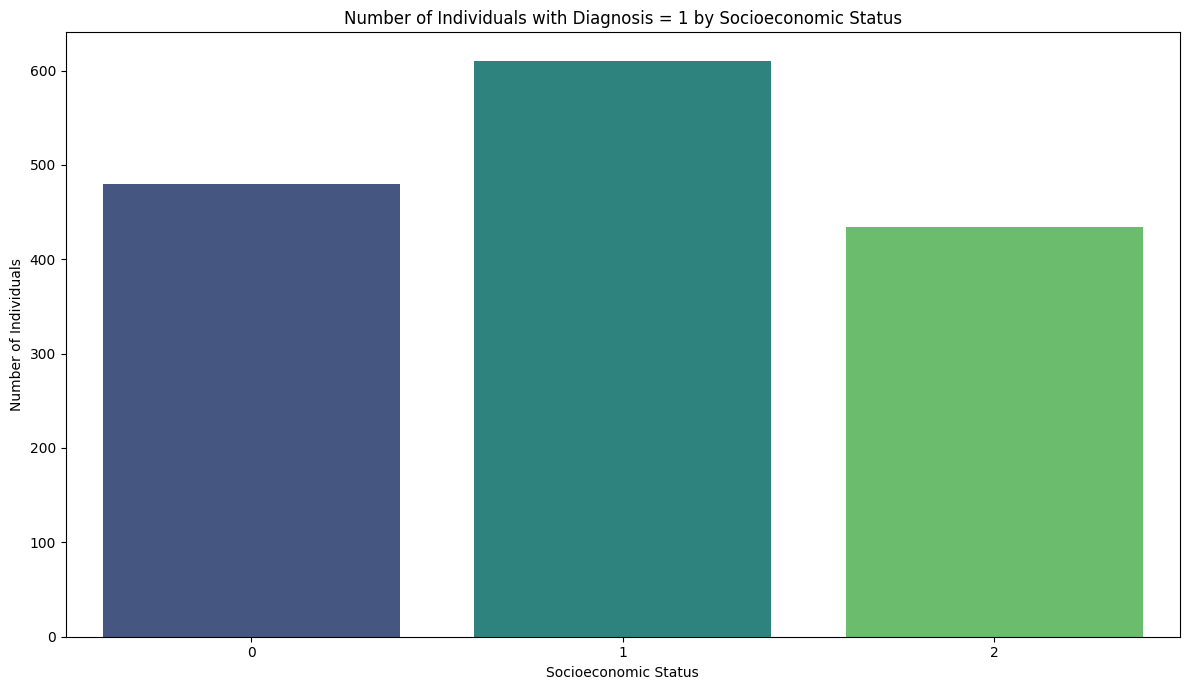

In [20]:
socioeconomic_diagnosis = diagnosis1_df['SocioeconomicStatus'].value_counts()
socioeconomic_diagnosis_df = socioeconomic_diagnosis.reset_index()
print(socioeconomic_diagnosis_df)
socioeconomic_diagnosis_df.columns = ['SocioeconomicStatus', 'Count']
print()
print(socioeconomic_diagnosis_df)
plt.figure(figsize = (12, 7))
sns.barplot(data = socioeconomic_diagnosis_df, x = 'SocioeconomicStatus', y = 'Count', palette = 'viridis')
plt.title('Number of Individuals with Diagnosis = 1 by Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

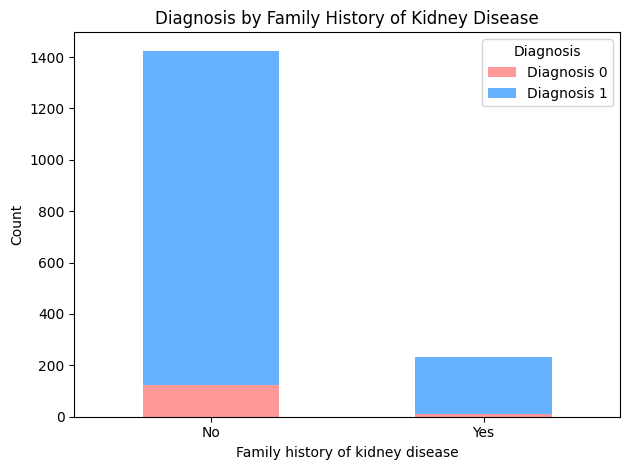

In [21]:
family_history_diagnosis = df.groupby('FamilyHistoryKidneyDisease')['Diagnosis'].value_counts().unstack()
plt.figure(figsize = (10, 6))
family_history_diagnosis.plot(kind = 'bar', stacked = True, color=['#FF9999', '#66B2FF'])
plt.title('Diagnosis by Family History of Kidney Disease')
plt.xlabel('Family history of kidney disease')
plt.ylabel('Count')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'], rotation = 0)
plt.legend(title='Diagnosis', labels=['Diagnosis 0', 'Diagnosis 1'])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

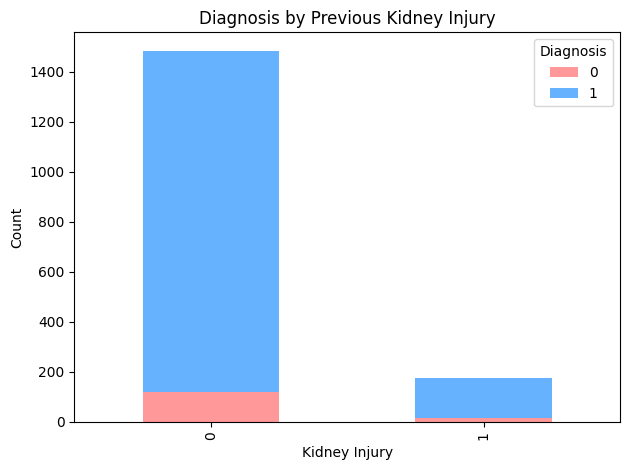

In [22]:
PreviousAcuteKidneyInjury_diagnosis = df.groupby('PreviousAcuteKidneyInjury')['Diagnosis'].value_counts().unstack()
plt.figure(figsize=(10, 6))
PreviousAcuteKidneyInjury_diagnosis.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'])
plt.title('Diagnosis by Previous Kidney Injury')
plt.xlabel('Kidney Injury')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1])
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

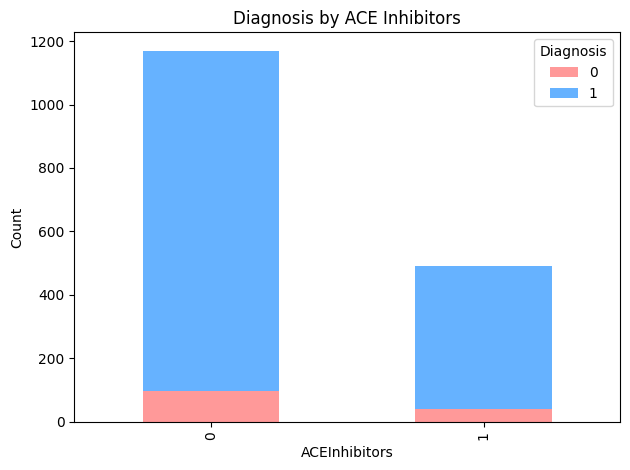

In [23]:
ACEInhibitors_diagnosis = df.groupby('ACEInhibitors')['Diagnosis'].value_counts().unstack()
plt.figure(figsize = (10, 6))
ACEInhibitors_diagnosis.plot(kind = 'bar', stacked = True, color=['#FF9999', '#66B2FF'])
plt.title('Diagnosis by ACE Inhibitors')
plt.xlabel('ACEInhibitors')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

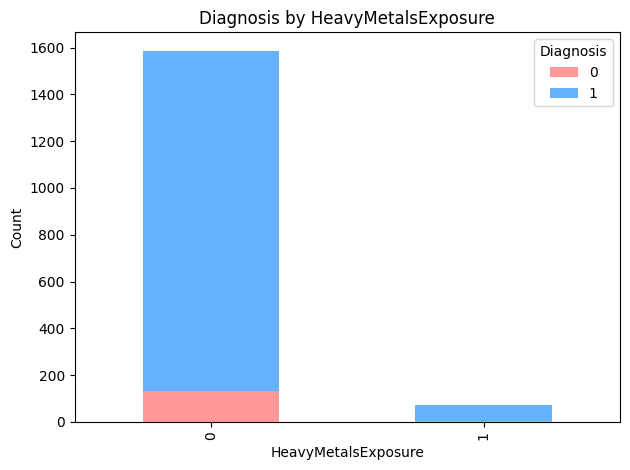

In [24]:
HeavyMetalsExposure_diagnosis = df.groupby('HeavyMetalsExposure')['Diagnosis'].value_counts().unstack()
plt.figure(figsize = (10, 6))
HeavyMetalsExposure_diagnosis.plot(kind = 'bar', stacked = True, color=['#FF9999', '#66B2FF'])
plt.title('Diagnosis by HeavyMetalsExposure')
plt.xlabel('HeavyMetalsExposure')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

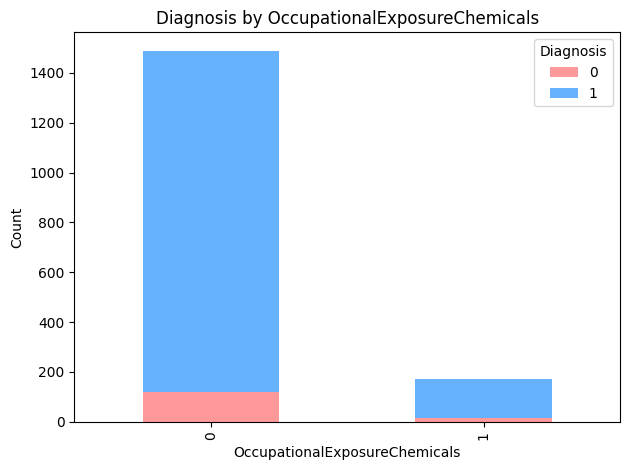

In [25]:
OccupationalExposureChemicals_diagnosis = df.groupby('OccupationalExposureChemicals')['Diagnosis'].value_counts().unstack()
plt.figure(figsize=(10, 6))
OccupationalExposureChemicals_diagnosis.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'])
plt.title('Diagnosis by OccupationalExposureChemicals')
plt.xlabel('OccupationalExposureChemicals')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

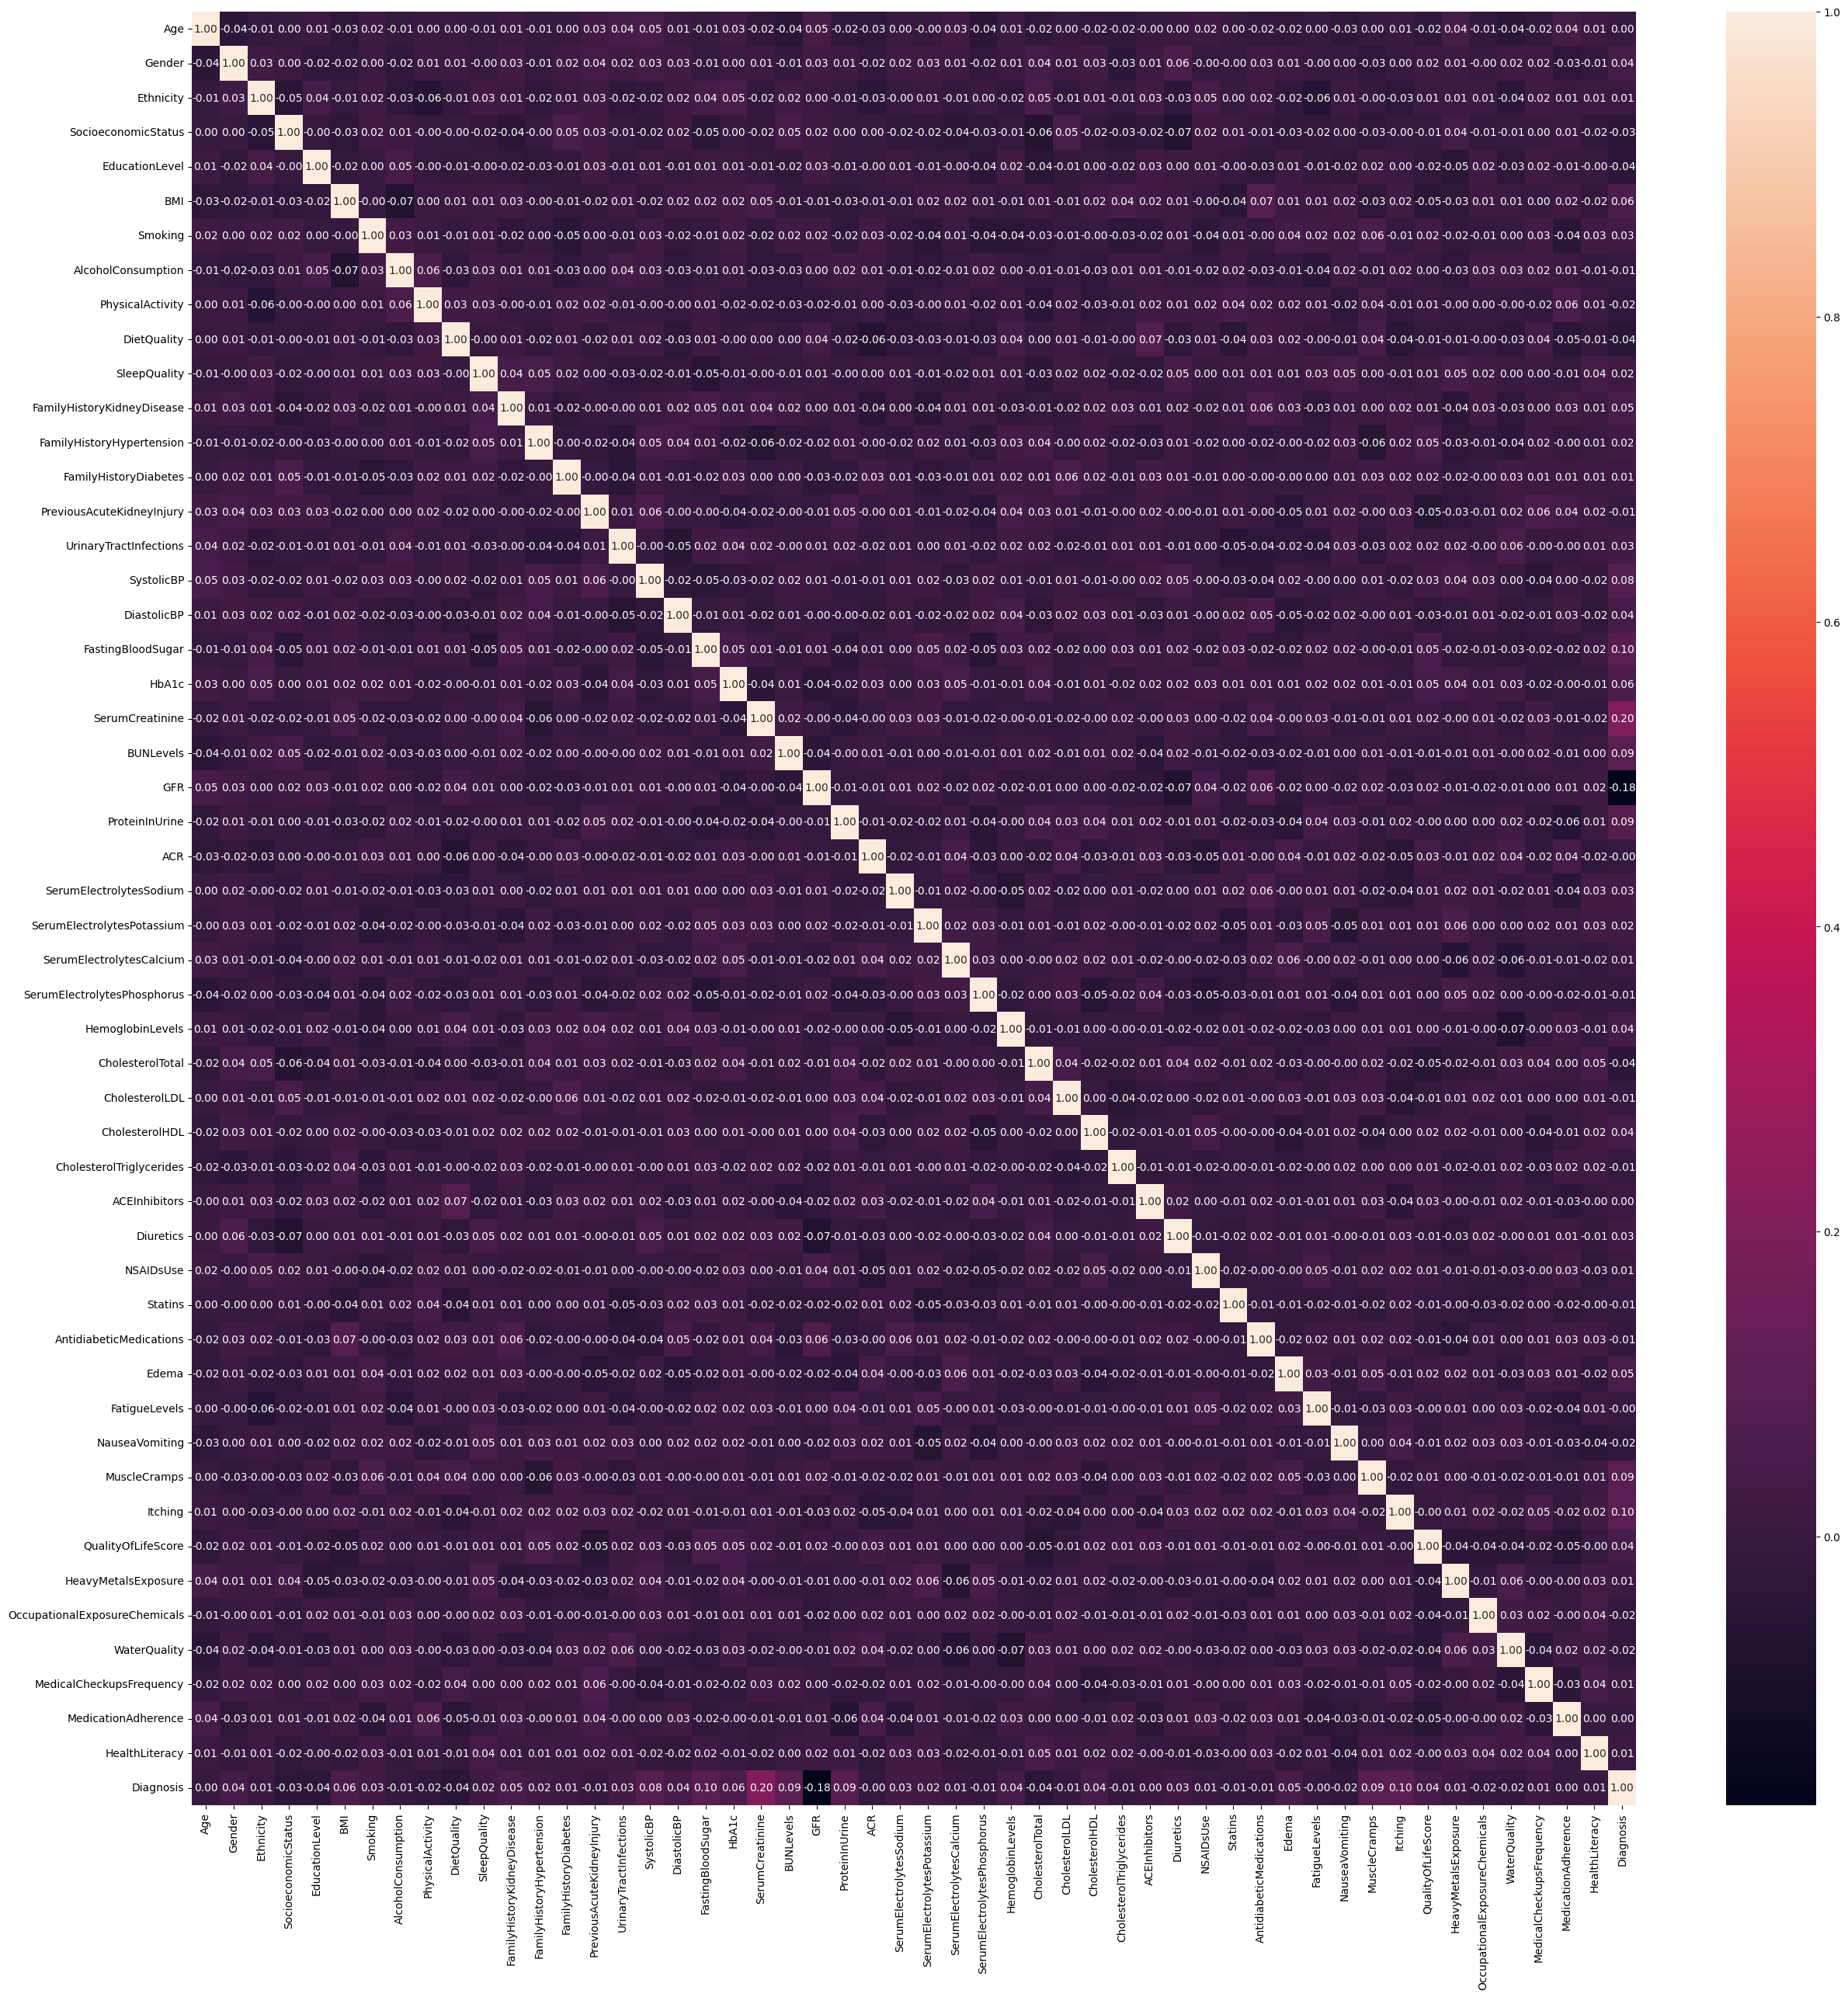

In [26]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.show()

In [27]:
correlation_matrix = df.corr(numeric_only = True)
strong_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['Diagnosis', col] >= 0.05) and col != 'Diagnosis']
X = df[strong_correlation_cols]
y = df['Diagnosis']

In [28]:
X

,BMI,FamilyHistoryKidneyDisease,SystolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,ProteinInUrine,Edema,MuscleCramps,Itching
0,31.069414,0,113,72.510788,9.212397,4.962531,25.605949,0.744980,0,4.518513,7.556302
1,29.692119,1,120,100.848875,4.604989,3.156799,31.338166,3.052317,0,2.202222,6.836766
2,37.394822,0,147,160.989441,5.432599,3.698236,39.738169,1.157839,0,5.967271,2.144722
3,31.329680,0,117,188.506620,4.144466,2.868468,21.980958,3.745871,0,2.176387,7.077188
4,23.726311,0,98,82.156699,4.262979,3.964877,12.216366,2.570993,0,6.800993,3.553118
...,...,...,...,...,...,...,...,...,...,...,...
1654,39.677059,0,130,195.433613,7.309465,2.191402,23.207131,2.926489,0,6.972093,2.138976
1655,28.922015,0,127,73.606489,4.357399,0.584633,27.145254,3.496617,1,0.465297,7.911566
1656,21.951219,0,118,163.084321,8.235078,0.527432,29.733737,3.549633,0,2.281970,0.015531
1657,24.964149,0,163,98.794331,6.298927,1.417972,15.773740,3.816679,0,0.257814,3.432765


In [29]:
ste = StandardScaler()
X_tr = ste.fit_transform(X)
X_tr = pd.DataFrame(data = X_tr, columns = X.columns.to_list())
X_tr

,BMI,FamilyHistoryKidneyDisease,SystolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,ProteinInUrine,Edema,MuscleCramps,Itching
0,0.473393,-0.405229,-0.830450,-1.642006,1.285161,1.677841,-0.154027,-1.206656,-0.503012,0.490246,0.868676
1,0.284372,2.467741,-0.558711,-0.866725,-1.371644,0.306508,0.293655,0.385425,-0.503012,-0.653308,0.618802
2,1.341496,-0.405229,0.489425,0.778617,-0.894413,0.717693,0.949690,-0.921780,-0.503012,1.205499,-1.010611
3,0.509112,-0.405229,-0.675170,1.531439,-1.637199,0.087540,-0.437137,0.863983,-0.503012,-0.666063,0.702294
4,-0.534379,-0.405229,-1.412747,-1.378111,-1.568860,0.920190,-1.199745,0.053308,-0.503012,1.617107,-0.521515
...,...,...,...,...,...,...,...,...,...,...,...
1654,1.654711,-0.405229,-0.170512,1.720950,0.187859,-0.426647,-0.341374,0.298603,-0.503012,1.701580,-1.012606
1655,0.178683,-0.405229,-0.286972,-1.612030,-1.514414,-1.646880,-0.033809,0.691996,1.988024,-1.510828,0.992049
1656,-0.777994,-0.405229,-0.636350,0.835929,0.721602,-1.690321,0.168350,0.728577,-0.503012,-0.613936,-1.750018
1657,-0.364497,-0.405229,1.110542,-0.922934,-0.394856,-1.014015,-0.921917,0.912842,-0.503012,-1.613263,-0.563310


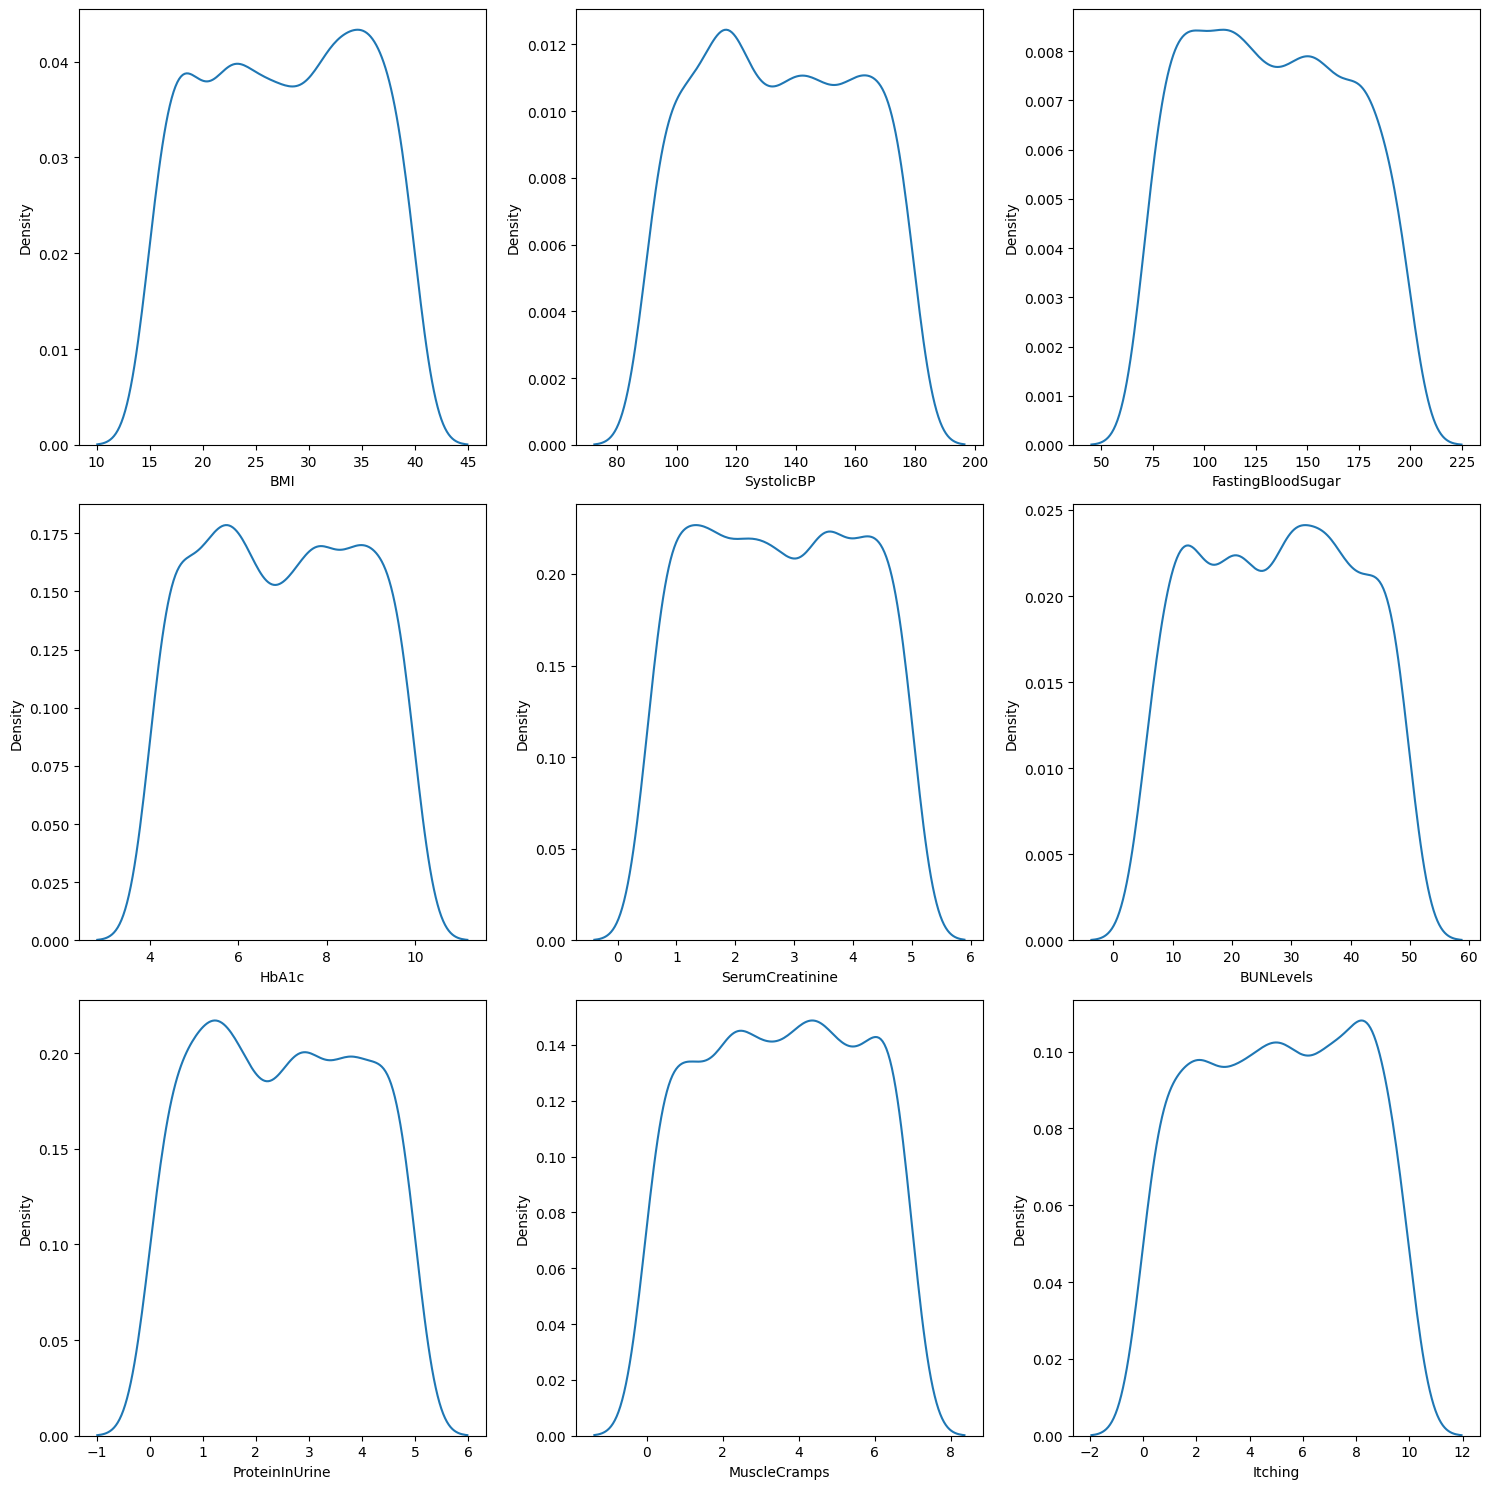

In [30]:
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
num_cols = X.drop(columns = ['FamilyHistoryKidneyDisease', 'Edema']).columns.to_list()
axis = axis.flatten()
for i in range(len(num_cols)):
    sns.kdeplot(x = X[num_cols[i]], ax = axis[i])
plt.tight_layout()
plt.show()

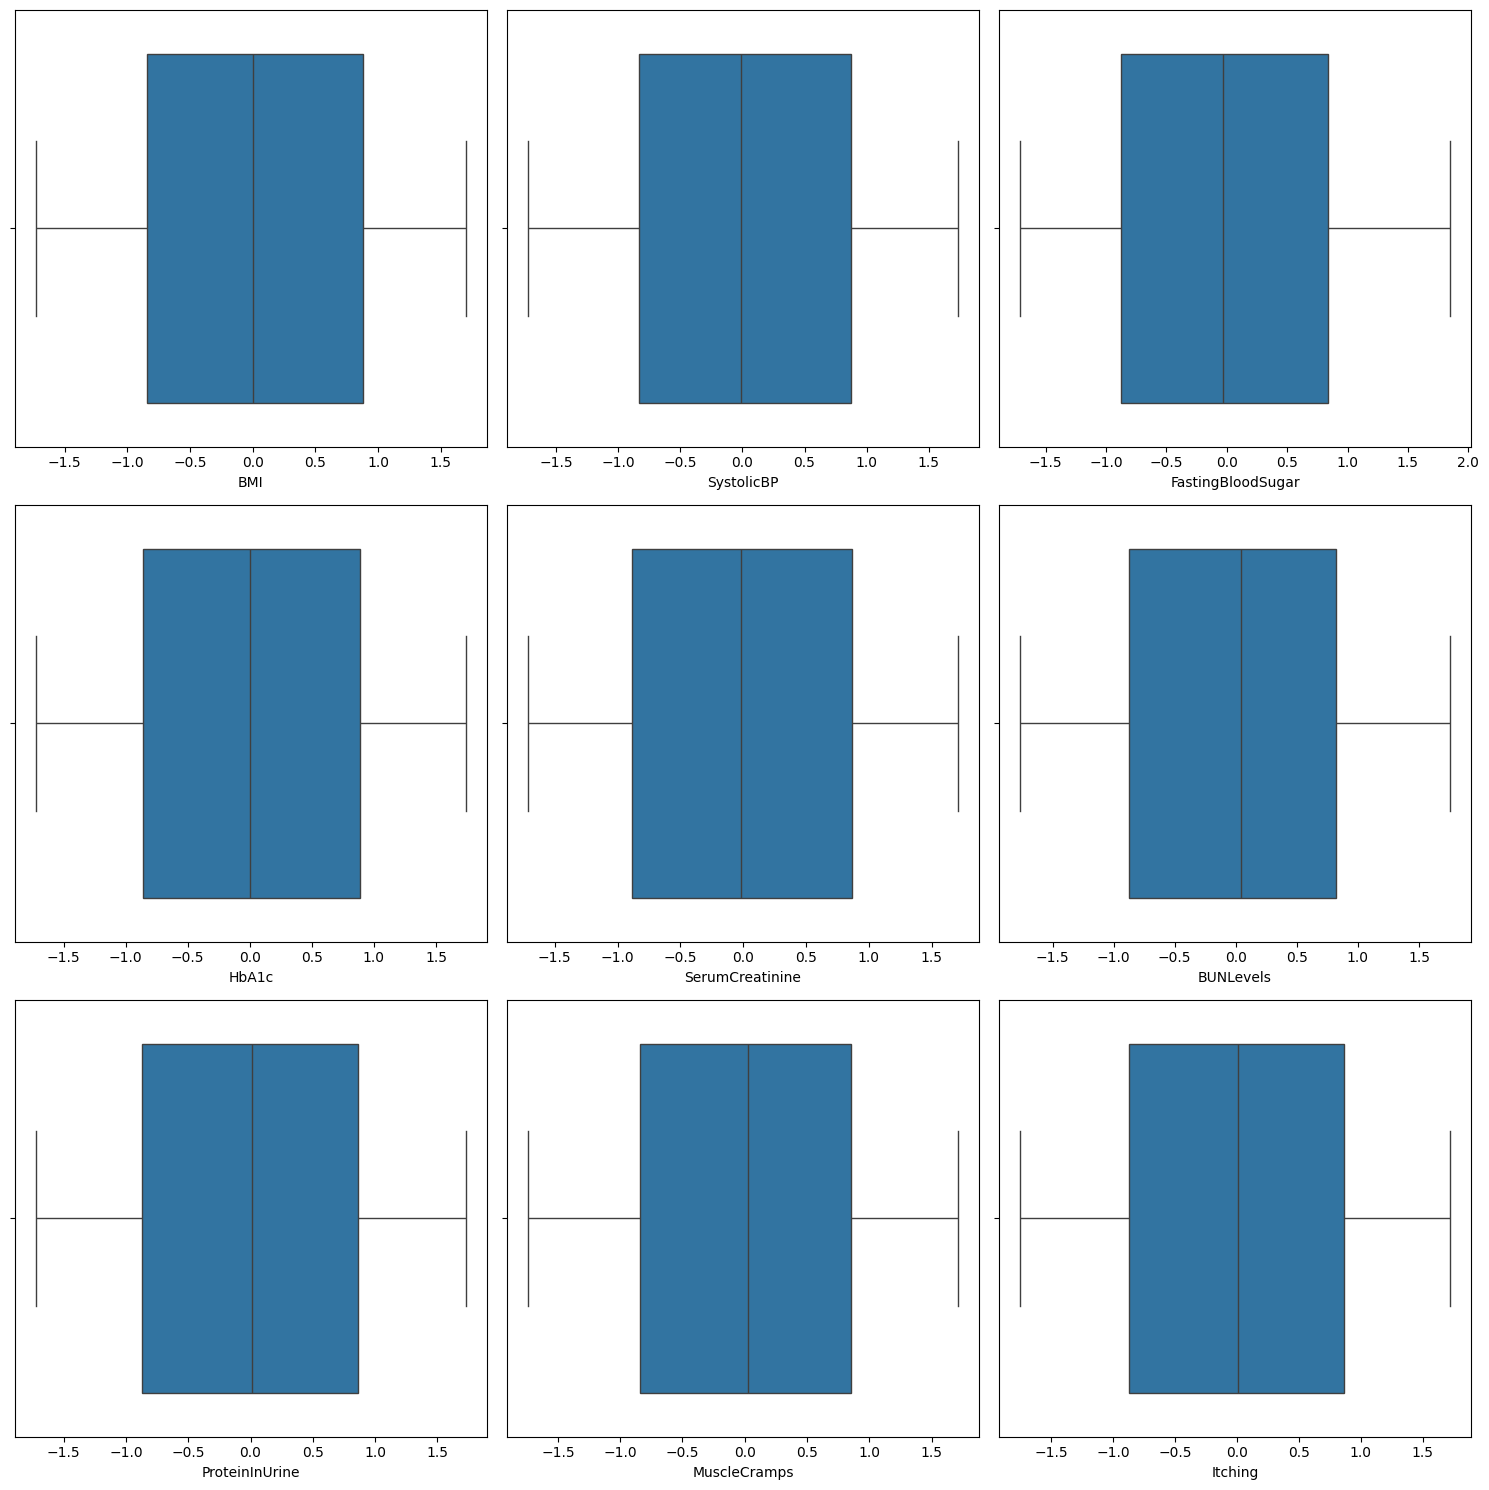

In [31]:
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axis = axis.flatten()
for i in range(len(num_cols)):
    sns.boxplot(x = X_tr[num_cols[i]], ax = axis[i])
plt.tight_layout()
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 22)

              precision    recall  f1-score   support

           0       0.95      0.27      0.42       381
           1       0.57      0.99      0.73       381

    accuracy                           0.63       762
   macro avg       0.76      0.63      0.57       762
weighted avg       0.76      0.63      0.57       762



In [68]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
Xt_rus, yt_rus = rus.fit_resample(X_train, y_train)
Xtt_rus, ytt_rus = rus.fit_resample(X_test, y_test)
rfr = RandomForestClassifier()
rfr.fit(Xt_rus, yt_rus)
print(classification_report(ytt_rus, rfr.predict(Xtt_rus)))

              precision    recall  f1-score   support

           0       0.91      0.16      0.27       381
           1       0.54      0.98      0.70       381

    accuracy                           0.57       762
   macro avg       0.72      0.57      0.48       762
weighted avg       0.72      0.57      0.48       762



<Axes: >

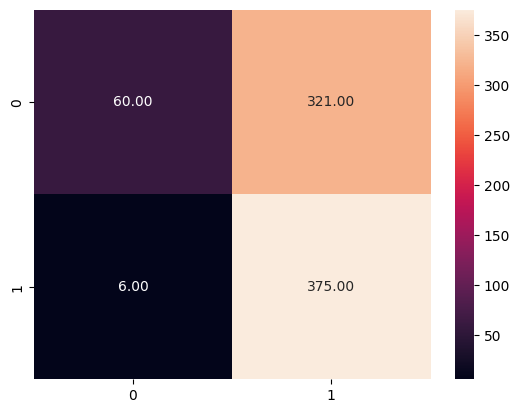

In [69]:
sns.heatmap(confusion_matrix(ytt_rus, rfr.predict(Xtt_rus)), annot = True, fmt = '.2f')

In [48]:
baggingclassifier = BalancedBaggingClassifier(n_jobs = -1)
param_grid = {'bootstrap_features' : [True, False], 'bootstrap' : [True, False], 'n_estimators' : [10, 20, 30, 40]}
bagging_cv = GridSearchCV(baggingclassifier, param_grid = param_grid, n_jobs = -1)
bagging_cv.fit(Xt_rus, yt_rus)
bagging_best = bagging_cv.best_estimator_
bagging_best.fit(Xt_rus, yt_rus)

BalancedBaggingClassifier(bootstrap=False, bootstrap_features=True,
                          n_estimators=30, n_jobs=-1)

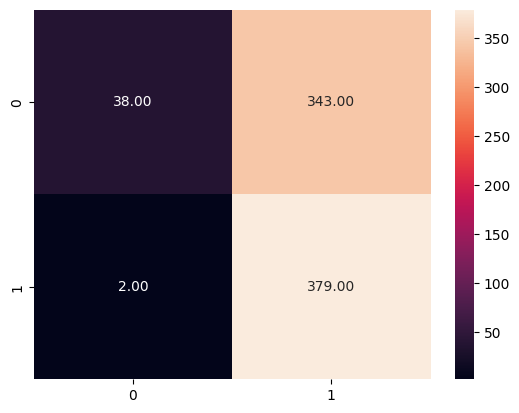

In [49]:
sns.heatmap(confusion_matrix(ytt_rus, bagging_best.predict(Xtt_rus)), annot = True, fmt = '.2f')
plt.show()

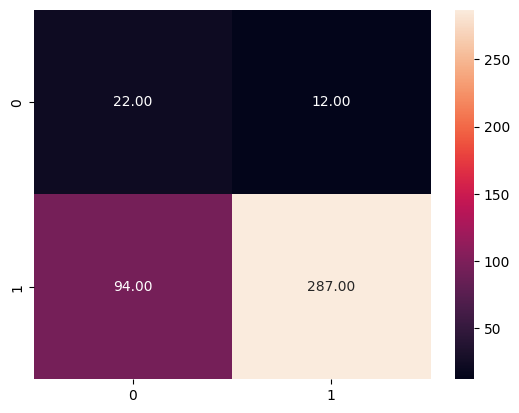

In [36]:
easyensemble = EasyEnsembleClassifier(estimator = BalancedRandomForestClassifier(), n_jobs = -1)
param_grid = {'n_estimators' : [10, 20 , 30, 40], 'replacement' : [True, False]}
easy_cv = GridSearchCV(easyensemble, param_grid = param_grid, n_jobs = -1)
easy_cv.fit(X_train, y_train)
easy = easy_cv.best_estimator_
easy.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, easy.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

e:\Python Interpreter\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Python Interpreter\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Python Interpreter\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_weight_boosting.py", line 230, in fit
    super().fit(X, y,

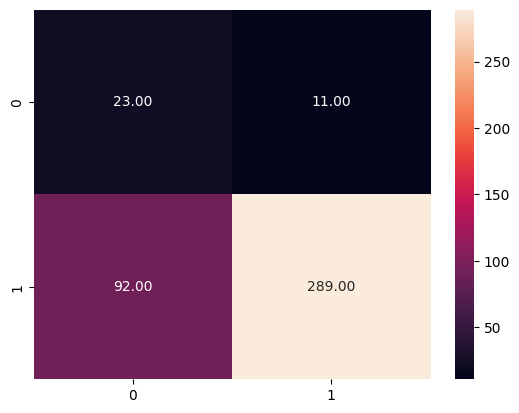

In [37]:
rub = RUSBoostClassifier()
param_grid = {'estimator' : [easy_cv.best_estimator_, bagging_cv.best_estimator_, RandomForestClassifier()], 'n_estimators' : [10, 20, 30],
             'learning_rate' : [0.01, 0.1, 0.5, 0.06, 0.04]}
rub_cv = GridSearchCV(rub, param_grid = param_grid, n_jobs = -1)
rub_cv.fit(X_train, y_train)
rub_best = rub_cv.best_estimator_
rub_best.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, rub_best.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Inte

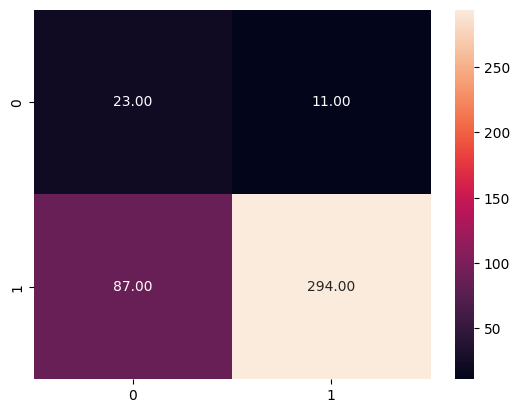

In [80]:
brfc = BalancedRandomForestClassifier(n_jobs=-1)
param_grid = {'n_estimators' : [70, 100, 130, 180, 200], 'min_samples_split' : [2, 3, 4], 'max_leaf_nodes' : [4, 5, 6],
              'replacement' : [True, False], 'class_weight' : ['balanced', None]}

brfc_cv = GridSearchCV(brfc, param_grid=param_grid, n_jobs = -1)
brfc_cv.fit(X_train, y_train)
brfc_best = brfc_cv.best_estimator_
brfc_best.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, brfc_best.predict(X_test)), annot=True, fmt = '.2f')
plt.show()

In [72]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
Xt_smote, yt_smote = smt.fit_resample(X_train, y_train)
Xtt_smote, ytt_smote = smt.fit_resample(X_test, y_test)

<Axes: >

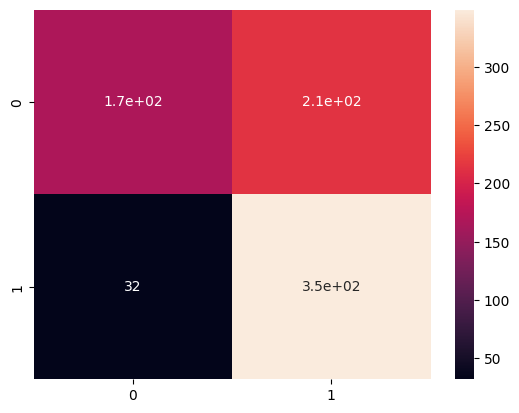

In [78]:
estimators1 = [
    ('rfr', RandomForestClassifier()),
    ('bagging', DecisionTreeClassifier()),
    ('rus', AdaBoostClassifier()),
    ('brfc', ExtraTreesClassifier())
]

vc = VotingClassifier(estimators = estimators1, voting = 'soft', n_jobs = -1)
vc.fit(Xt_smote, yt_smote)
sns.heatmap(confusion_matrix(ytt_smote, vc.predict(Xtt_smote)), annot = True)

### Random Under Sampler

In [101]:
rus = RandomUnderSampler()
Xt_res, yt_res = rus.fit_resample(X_train, y_train)
Xtt_res, ytt_res = rus.fit_resample(X_test, y_test)

In [39]:
rfr1 = RandomForestClassifier()
rfr1.fit(Xt_res, yt_res)
print(confusion_matrix(ytt_res, rfr1.predict(Xtt_res)))

[[22 12]
 [11 23]]


<Axes: >

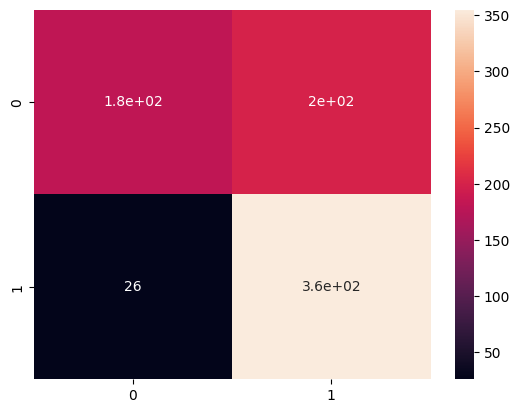

In [74]:
estimators1 = [
    ('easy', easy_cv.best_estimator_),
    ('bagging', bagging_cv.best_estimator_),
    ('rus', RUSBoostClassifier(learning_rate = 0.1)),
    ('brfc', BalancedRandomForestClassifier()),
    ('adc', AdaBoostClassifier())
]

vc1 = VotingClassifier(estimators = estimators1, voting = 'hard', n_jobs = -1)
vc1.fit(Xt_smote, yt_smote)
sns.heatmap(confusion_matrix(ytt_smote, vc1.predict(Xtt_smote)), annot = True)

e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\L

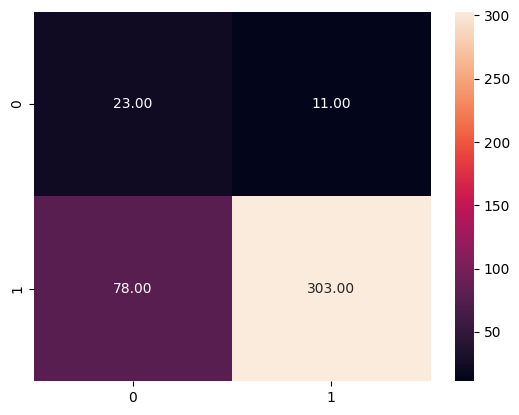

In [50]:
brfc = BalancedRandomForestClassifier(n_jobs = -1)
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2, 4, 6, 3], 'min_impurity_decrease' : [0.01, 0.02, 0.03]}
brfc_cv = GridSearchCV(brfc, param_grid = param_grid, n_jobs = -1)
brfc_cv.fit(X_train, y_train)
brfc_best = brfc_cv.best_estimator_
brfc_best.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, brfc_best.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

In [62]:
import joblib as jb
jb.dump(brfc_best, 'model29.pkl')

['model29.pkl']

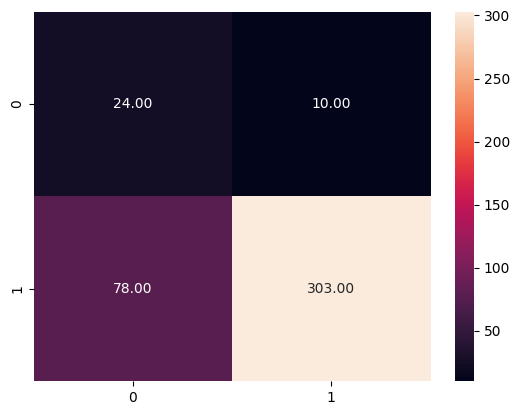

In [42]:
brfc_easy = brfc_cv.best_estimator_
easy1 = EasyEnsembleClassifier(estimator = brfc_easy, n_jobs = -1)
param_grid = {'n_estimators' : [20, 30, 40, 50], 'sampling_strategy' : ['majority', 'not majority', 'all']}
easy1_cv = GridSearchCV(easy1, param_grid = param_grid, n_jobs = -1)
easy1_cv.fit(X_train, y_train)
easy1_best = easy1_cv.best_estimator_
easy1_best.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, easy1_best.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

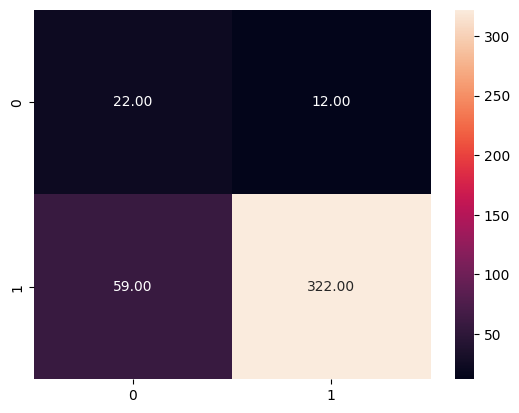

In [43]:
rfr2 = BalancedBaggingClassifier(estimator = easy1_cv.best_estimator_, n_estimators = 30)
rfr2.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, rfr2.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

In [53]:
from xgboost import XGBClassifier
import optuna

In [54]:
def objective(trial):
    # Define hyperparameters to be tuned
    param = {
        'objective': 'binary:logistic',
        'verbosity': 0,
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',  # Use GPU if available
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.7, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.7, 1.0]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True)
    }
    
    # Create the XGBClassifier model
    model = XGBClassifier(**param)

    # Train the model
    model.fit(Xt_rus, yt_rus)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, Xtt_rus, ytt_rus, cv=3, scoring='f1')
    return score.mean()

In [55]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# Print and return the best hyperparameters
best_params = study.best_params
print('Best hyperparameters: ', best_params)

[I 2024-07-30 10:36:59,473] A new study created in memory with name: no-name-3449c2eb-d08c-4869-957d-126aa77c095e
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

Best hyperparameters:  {'lambda': 8.480335539287547e-07, 'alpha': 7.333172020373887e-07, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.07299765052388667, 'n_estimators': 773, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.000106359759600805}


e:\Python Interpreter\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
e:\Python Int

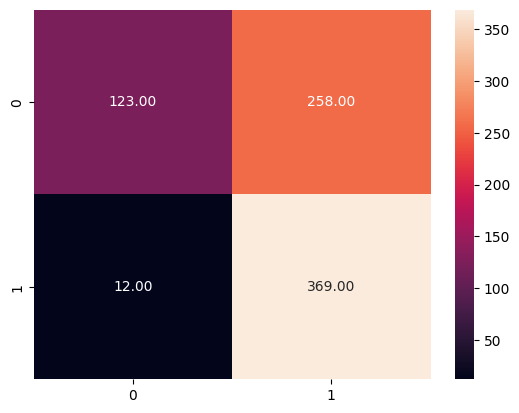

In [57]:
best_params_xgb = best_params
model = XGBClassifier(**best_params_xgb)
model.fit(Xt_rus, yt_rus)
sns.heatmap(confusion_matrix(ytt_rus, model.predict(Xtt_rus)), annot = True, fmt = '.2f')
plt.show()

In [59]:
from catboost import CatBoostClassifier, Pool

In [49]:
def objective(trial):
    # Define hyperparameters to be tuned
    param = {
        'objective': 'Logloss',
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 1.0, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'thread_count': -1,
        'task_type': 'GPU' if trial.suggest_categorical('use_gpu', [True, False]) else 'CPU',
        'devices' : '0',
        
    }

    # Create the CatBoostClassifier model
    model = CatBoostClassifier(**param, silent=True)

    train_pool = Pool(X_train, y_train)
    # Train the model
    model.fit(train_pool)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs = -1)
    return score.mean()

In [50]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=600)

# Print and return the best hyperparameters
best_params = study.best_params
print('Best hyperparameters: ', best_params)

[I 2024-07-29 23:55:08,764] A new study created in memory with name: no-name-d857d759-40ee-4a38-91fd-45db9e36a37b


[I 2024-07-29 23:55:15,512] Trial 0 finished with value: 0.9574356655794989 and parameters: {'iterations': 493, 'depth': 8, 'learning_rate': 0.024691404742164132, 'l2_leaf_reg': 0.0004225459853848516, 'border_count': 159, 'use_gpu': False}. Best is trial 0 with value: 0.9574356655794989.
[W 2024-07-29 23:56:20,216] Trial 1 failed with parameters: {'iterations': 517, 'depth': 10, 'learning_rate': 0.016722452055929326, 'l2_leaf_reg': 4.012976204447256e-08, 'border_count': 45, 'use_gpu': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "e:\Python Interpreter\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_18812\218065921.py", line 24, in objective
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs = -1)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

Learning rate set to 0.014664
0:	learn: 0.6841007	total: 74.3ms	remaining: 1m 14s
1:	learn: 0.6750243	total: 84ms	remaining: 41.9s
2:	learn: 0.6657537	total: 93.3ms	remaining: 31s
3:	learn: 0.6571010	total: 103ms	remaining: 25.6s
4:	learn: 0.6469203	total: 113ms	remaining: 22.5s
5:	learn: 0.6364340	total: 123ms	remaining: 20.3s
6:	learn: 0.6262798	total: 134ms	remaining: 19s
7:	learn: 0.6199472	total: 148ms	remaining: 18.4s
8:	learn: 0.6125924	total: 159ms	remaining: 17.5s
9:	learn: 0.6041415	total: 169ms	remaining: 16.7s
10:	learn: 0.5966251	total: 179ms	remaining: 16.1s
11:	learn: 0.5879434	total: 189ms	remaining: 15.5s
12:	learn: 0.5800380	total: 198ms	remaining: 15s
13:	learn: 0.5742254	total: 210ms	remaining: 14.8s
14:	learn: 0.5670248	total: 219ms	remaining: 14.4s
15:	learn: 0.5606752	total: 229ms	remaining: 14.1s
16:	learn: 0.5539711	total: 239ms	remaining: 13.8s
17:	learn: 0.5472025	total: 248ms	remaining: 13.5s
18:	learn: 0.5405952	total: 258ms	remaining: 13.3s
19:	learn: 0.53

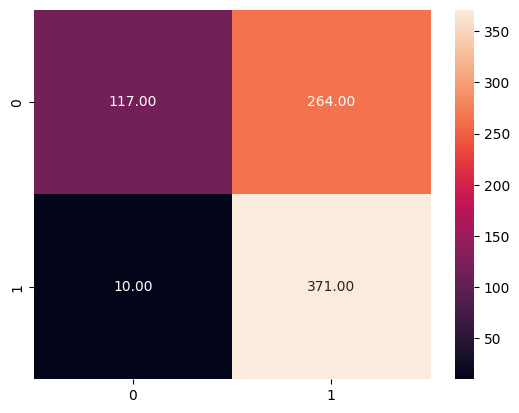

In [60]:
catboost = CatBoostClassifier()
catboost.fit(Xt_rus, yt_rus)
sns.heatmap(confusion_matrix(ytt_rus, catboost.predict(Xtt_rus)), annot = True, fmt = '.2f')
plt.show()

[LightGBM] [Info] Number of positive: 1143, number of negative: 1143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 2286, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


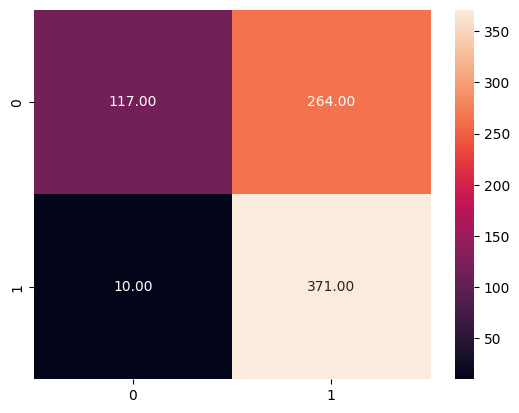

In [62]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(Xt_rus, yt_rus)
sns.heatmap(confusion_matrix(ytt_rus, catboost.predict(Xtt_rus)), annot = True, fmt = '.2f')
plt.show()

[LightGBM] [Info] Number of positive: 1143, number of negative: 101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2137
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.918810 -> initscore=2.426291
[LightGBM] [Info] Start training from score 2.426291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

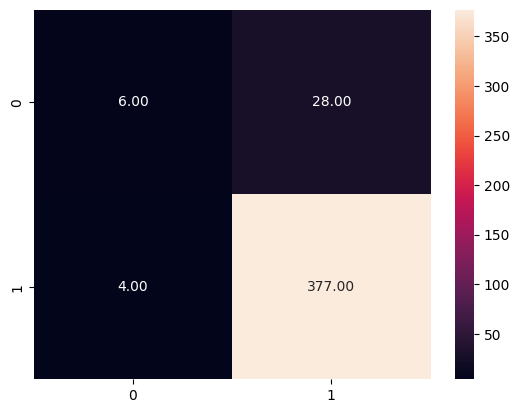

In [53]:
abc1 = AdaBoostClassifier()
param_grid = {'estimator' : [XGBClassifier(alpha = 0.22992293498080327, colsample_bytree = 1.0, subsample = 0.7, learning_rate = 0.014973111828155928,
                                                  n_estimators =  359, max_depth =  8, min_child_weight = 6, gamma = 0.22455135225825248),
                             CatBoostClassifier(), LGBMClassifier()], 'n_estimators' : [20, 30]}

abc1_cv = GridSearchCV(abc1, param_grid = param_grid, n_jobs = -1, scoring = 'f1')
abc1_cv.fit(X_train, y_train)
abc1_best = abc1_cv.best_estimator_
abc1_best.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, abc1_best.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

In [54]:
stc1 = StackingClassifier(estimators = estimators1, final_estimator=XGBClassifier(alpha = 0.22992293498080327, colsample_bytree = 1.0, subsample = 0.7, learning_rate = 0.014973111828155928,
                                                  n_estimators =  359, max_depth =  8, min_child_weight = 6, gamma = 0.22455135225825248), n_jobs = -1)
estimators2 = [
    ('stc1', stc1),
    ('abc1', abc1_cv.best_estimator_),
    ('lgbm', LGBMClassifier()),
    ('catboost', CatBoostClassifier())
]

stc2 = StackingClassifier(estimators = estimators2, final_estimator = BalancedRandomForestClassifier(), n_jobs = -1)
stc2.fit(X_train, y_train)

KeyboardInterrupt: 

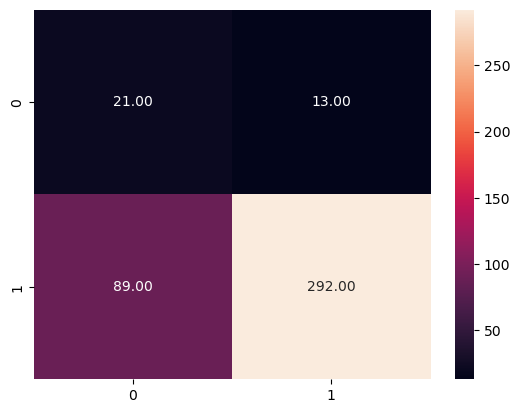

In [316]:
sns.heatmap(confusion_matrix(y_test, stc2.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

In [ ]:
easy_cv.best_estimator_
bagging_cv.best_estimator_
brfc_cv.best_estimator_
BalancedBaggingClassifier(estimator = easy1_cv.best_estimator_, n_estimators = 30)
XGBClassifier(**best_params_xgb)

e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\L

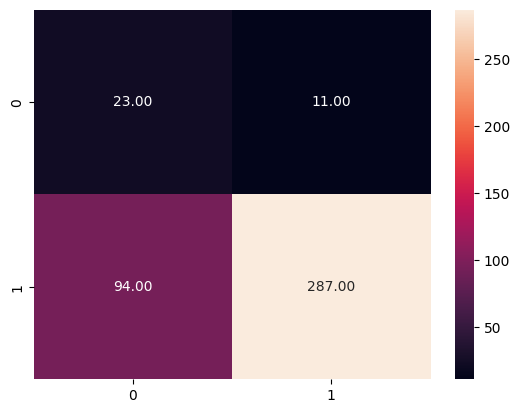

In [55]:
estimators3 = [
    ('easy', easy_cv.best_estimator_),
    ('brfc', bagging_cv.best_estimator_),
    ('bbc', BalancedBaggingClassifier(estimator = easy1_cv.best_estimator_, n_estimators = 30, n_jobs = -1)),
    ('xgb', XGBClassifier(**best_params_xgb))
]

sc = StackingClassifier(estimators = estimators3, final_estimator = BalancedRandomForestClassifier(), n_jobs = -1)
sc.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, sc.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Int

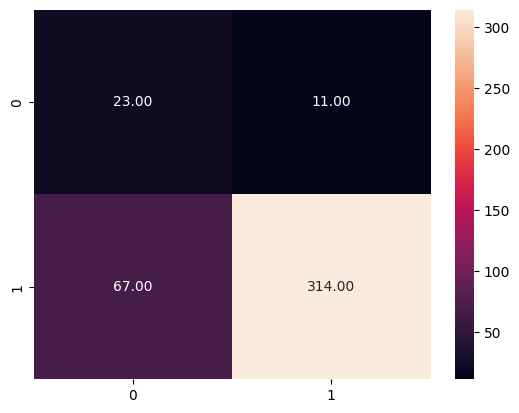

In [65]:
brfc1 = BalancedRandomForestClassifier(n_jobs = -1)
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2, 4, 6, 3, 5], 'min_impurity_decrease' : [0.01, 0.02, 0.03, 0.04],
            'bootstrap' : [True, False]}
brfc_cv1 = GridSearchCV(brfc1, param_grid = param_grid, n_jobs = -1)
brfc_cv1.fit(X_train, y_train)
brfc_best1 = brfc_cv1.best_estimator_
brfc_best1.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, brfc_best1.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Int

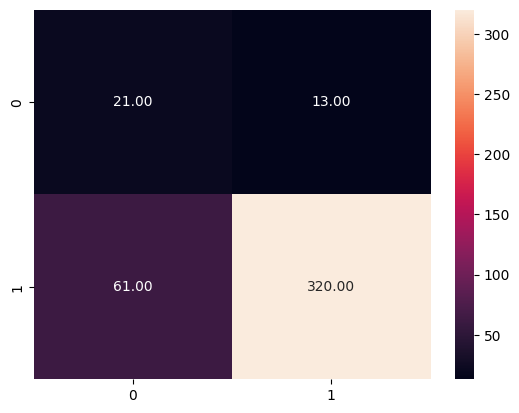

In [61]:
abc4 = BalancedBaggingClassifier(estimator=brfc_cv1.best_estimator_, n_estimators = 30)
abc4.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, abc4.predict(X_test)), annot = True, fmt = '.2f')
plt.show()

e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Interpreter\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
e:\Python Int

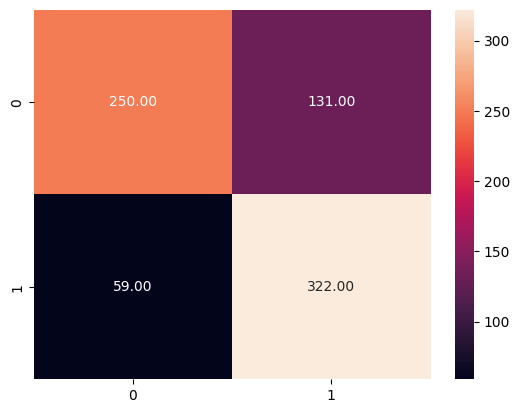

In [71]:
abc4 = BalancedBaggingClassifier(estimator=brfc_cv1.best_estimator_, n_estimators = 30)
abc4.fit(Xt_smote, yt_smote)
sns.heatmap(confusion_matrix(ytt_smote, abc4.predict(Xtt_smote)), annot = True, fmt = '.2f')
plt.show()

In [84]:
from imblearn.over_sampling import ADASYN
adsn = ADASYN()
Xt_adsn, yt_adsn = adsn.fit_resample(X_train, y_train)
Xtt_adsn, ytt_adsn = adsn.fit_resample(X_test, y_test)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

e:\Python Interpreter\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
e:\Python Interpreter\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
e:\Python Int

<Axes: >

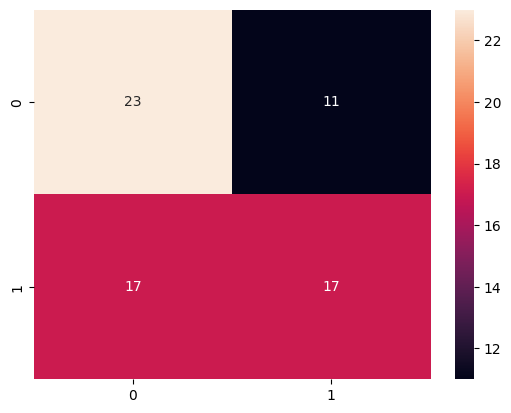

In [112]:
estimators1 = [
    ('rfr', RandomForestClassifier()),
    ('bagging', DecisionTreeClassifier()),
    ('abc', AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=20)),
    ('rus', XGBClassifier())
    #('brfc', LGBMClassifier()),
    #('catboost', CatBoostClassifier())
]

sc3 = StackingClassifier(estimators = estimators1, final_estimator=RandomForestClassifier())

estimators4 = [
    ('sc3', sc3),
    ('gbc', GradientBoostingClassifier()),
    ('lr', LogisticRegression()),
    ('lrcv', LogisticRegressionCV())
]

sc4 = StackingClassifier(estimators=estimators4, final_estimator=HistGradientBoostingClassifier())
sc3.fit(Xt_res, yt_res)
sns.heatmap(confusion_matrix(ytt_res, vc.predict(Xtt_res)), annot = True)

In [83]:
yt_smote.value_counts()

Diagnosis
1    1143
0    1143
Name: count, dtype: int64